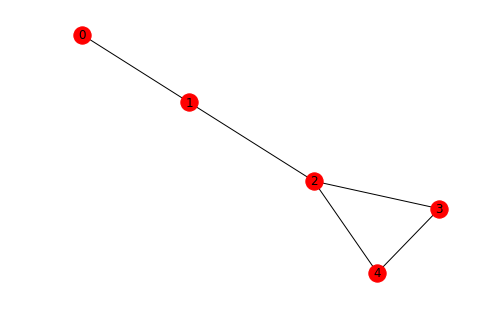

In [1]:
from numpy  import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(2,4)

nx.draw(G, with_labels=True)
plt.show()

According to modularity, which of the following options  forms better communities? <br>
i)	Cluster1={0, 1, 2}, cluster2={3,4}<br>
ii)	Cluster1={0,1}, cluster1={2,3,4}


A is the Adjacency matrix of the graph

In [2]:
A=nx.to_numpy_matrix(G)
print(np.matrix(A))

[[ 0.  1.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  1.  0.  1.  1.]
 [ 0.  0.  1.  0.  1.]
 [ 0.  0.  1.  1.  0.]]


In [3]:
m = G.number_of_edges()
print(m) 

5


In [4]:
#initialize M[5][5] to store the multplication of the degree of two nodes
M = [[0 for x in range(5)]for y in range(5)] 

for i in range(0,5):
    for j in range(0,5):
        M[i][j]=G.degree(i)*G.degree(j)
        
print(np.matrix(M))

[[1 2 3 2 2]
 [2 4 6 4 4]
 [3 6 9 6 6]
 [2 4 6 4 4]
 [2 4 6 4 4]]


The expected number of edges for each pair of nodes is given by <br>
$b_{ij} = \frac{d_id_j}{2m}$ 

In [5]:
B = multiply(M,1/(2*m))
print(B)


[[ 0.1  0.2  0.3  0.2  0.2]
 [ 0.2  0.4  0.6  0.4  0.4]
 [ 0.3  0.6  0.9  0.6  0.6]
 [ 0.2  0.4  0.6  0.4  0.4]
 [ 0.2  0.4  0.6  0.4  0.4]]


Let $S = A - B $

In [6]:
S = A - B
print(S)


[[-0.1  0.8 -0.3 -0.2 -0.2]
 [ 0.8 -0.4  0.4 -0.4 -0.4]
 [-0.3  0.4 -0.9  0.4  0.4]
 [-0.2 -0.4  0.4 -0.4  0.6]
 [-0.2 -0.4  0.4  0.6 -0.4]]


Consider option1:
Cluster1={0, 1, 2}, cluster2={3,4}<br>
We may sum up  the values in S[0][0], s[0][1], s[0][2],  S[1][0], s[1][1], s[1][2], S[2][0], s[2][1], s[2][2] to compute the strength of cluster1.

We may sum up  the values in S[3][3], s[3][4], s[4][3],  S[4][4]  to compute the strength of cluster2. 

Mutiplying the strength by 1/(2m) computes the modularity.

In [7]:
cluster1 = {0,1,2}
cluster2 = {3,4}

sum1 = 0
for i in cluster1:
    for j in cluster1:
        sum1 += S.item(i,j)
sum1 = sum1/(2*m)
print("modularity(cluster 1)=%.2f"%(sum1))

sum2 = 0
for i in cluster2:
    for j in cluster2:
        sum2 += S.item(i,j)
sum2 = sum2/(2*m)
print("modularity(cluster 2)=%.2f"%(sum2))

print("overall modularity Q = ", round(sum1+sum2,2))

modularity(cluster 1)=0.04
modularity(cluster 2)=0.04
overall modularity Q =  0.08


For	Cluster1={0,1}, cluster1={2,3,4},
we may sum up  the values in S[0][0], s[0][1], s[0][2],  S[1][0], s[1][1], s[1][2] to compute the strength of cluster1.

We may sum up  the values in S[2][0], s[2][1], s[2][2], S[3][3], s[3][4], s[4][3],  S[4][4]  to compute the strength of cluster2. 

Mutiplying the strength by 1/(2m) computes the modularity.

In [8]:
cluster1 = {0,1}
cluster2 = {2,3,4}

sum1 = 0
for i in cluster1:
    for j in cluster1:
        sum1 += S.item(i,j)

sum1 = sum1/(2*m)
print("modularity(cluster 1)=%.2f"%(sum1))

sum2 = 0
for i in cluster2:
    for j in cluster2:
        sum2 += S.item(i,j)

sum2 = sum2/(2*m)
print("modularity(cluster 2)=%.2f"%(sum2))

print("overall modularity Q: ", round(sum1+sum2,2))

modularity(cluster 1)=0.11
modularity(cluster 2)=0.11
overall modularity Q:  0.22


In community detection, we want to separate the nodes into clusters  by maximizing the sum of the modularity of each of clusters. Option (ii) results in a higher overall modularity and is a better breakdown of clusters  than option (i).